<a href="https://colab.research.google.com/github/yogeshjadhav1997/machine-learning-Project/blob/main/Mushroom_Classification_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load Libraries

In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Load Dataset

In [6]:
data=pd.read_csv(r'/content/mushrooms.csv')

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [9]:
# Attribute Information:

# classes: edible=e, poisonous=p 

# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# bruises: bruises=t,no=f

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

# gill-attachment: attached=a,descending=d,free=f,notched=n

# gill-spacing: close=c,crowded=w,distant=d

# gill-size: broad=b,narrow=n

# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

# stalk-shape: enlarging=e,tapering=t

# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# veil-type: partial=p,universal=u

# veil-color: brown=n,orange=o,white=w,yellow=y

# ring-number: none=n,one=o,two=t

#  ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [10]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [11]:
# get shape of data

data.shape

(8124, 23)

In [12]:
#get information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
#check the NUll Values in Dataset

data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Statistics about Dataset

In [14]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Data Maupulation

In [15]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# we need to convert categoricat to numerical values. ML algoritham understands numrical values

In [16]:
data=data.astype('category')

In [17]:
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in data.columns:
    data[column]=le.fit_transform(data[column])

In [19]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


# Split data

In [20]:
X=data.drop('class',axis=1)

y=data['class']

print("shape of X : ",X.shape)
print("shape of y : ",y.shape)

shape of X :  (8124, 22)
shape of y :  (8124,)


# Applying PCA

In [21]:
from sklearn.decomposition import PCA

pca1=PCA(n_components=7)

Z=pca1.fit_transform(X)


In [22]:
pca1.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841])

In [23]:
sum(pca1.explained_variance_ratio_)

0.8501681635086212

In [24]:
Z.shape

(8124, 7)

# Spliting the dataset into Training Set and Test Set

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(Z,y,test_size=0.2,random_state=42)

In [26]:
print("shape of X_train : ",X_train.shape)
print("shape of y_train : ",y_train.shape)
print("shape of X_test : ",X_test.shape)
print("shape of y_test : ",y_test.shape)

shape of X_train :  (6499, 7)
shape of y_train :  (6499,)
shape of X_test :  (1625, 7)
shape of y_test :  (1625,)


# Import ML Models

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

# Model Training

In [28]:
#Logistic Regression

lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [29]:
#K-Nearest Neighbor(KNN) Classification
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [30]:
#Support Vector Machines Classification
svc=SVC()
svc.fit(X_train,y_train)


SVC()

In [31]:
#Decision Tree Classification

dtc=DecisionTreeClassifier()

dtc.fit(X_train,y_train)


DecisionTreeClassifier()

In [35]:
#Random Forest Classification

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [33]:
#Gradient Boosting Classifier
gbc=GradientBoostingClassifier()

gbc.fit(X_train,y_train)


GradientBoostingClassifier()

# Prediction om Test Data

In [36]:
y_pred1=lr.predict(X_test)  ##Logistic Regression

y_pred2=knn.predict(X_test)  #K-Nearest Neighbor(KNN) Classification

y_pred3=svc.predict(X_test)   #Support Vector Machines Classification

y_pred4=dtc.predict(X_test)   #Decision Tree Classification

y_pred5=rfc.predict(X_test)   #Random Forest Classification


y_pred6=gbc.predict(X_test)   #Gradient Boosting Classifier


# Evaluating the Algorithm

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print("Accurancy Score of Logistic Regression Algorithm          : ",accuracy_score(y_test,y_pred1))
print("Accurancy Score K-Nearest Neighbor(KNN) Classification    : ",accuracy_score(y_test,y_pred2))
print("Accurancy Score Support Vector Machines Classification    : ",accuracy_score(y_test,y_pred3))
print("Accurancy Score of Decision Tree Classification Algorithm : ",accuracy_score(y_test,y_pred4))
print("Accurancy Score of Random Forest Classification Algorithm : ",accuracy_score(y_test,y_pred5))
print("Accurancy Score of Gradient Boosting Classifier Algorithm : ",accuracy_score(y_test,y_pred6))

Accurancy Score of Logistic Regression Algorithm          :  0.8344615384615385
Accurancy Score K-Nearest Neighbor(KNN) Classification    :  0.9833846153846154
Accurancy Score Support Vector Machines Classification    :  0.952
Accurancy Score of Decision Tree Classification Algorithm :  0.9772307692307692
Accurancy Score of Random Forest Classification Algorithm :  0.9975384615384615
Accurancy Score of Gradient Boosting Classifier Algorithm :  0.9384615384615385


In [39]:
final_data=pd.DataFrame({'Models':['LR','KNN','SVC','DT','RF','GB'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                    accuracy_score(y_test,y_pred3)*100,
                    accuracy_score(y_test,y_pred4)*100,
                    accuracy_score(y_test,y_pred5)*100,
                    accuracy_score(y_test,y_pred6)*100]})

In [40]:
final_data

,Models,ACC
0,LR,83.446154
1,KNN,98.338462
2,SVC,95.200000
3,DT,97.723077
4,RF,99.753846
5,GB,93.846154


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


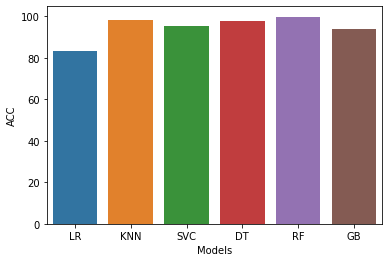

In [41]:
sns.barplot(final_data['Models'],final_data['ACC'])

# Save the Model

In [42]:
rf_model=RandomForestClassifier()

rf_model.fit(Z,y)

RandomForestClassifier()

In [43]:
import joblib

In [44]:
joblib.dump(rf_model,"mushrooms_Prediction")

['mushrooms_Prediction']

In [45]:
model=joblib.load('mushrooms_Prediction')

In [46]:
p=model.predict(pca1.transform([[5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [47]:
p

array([1])

In [48]:
if p[0]==1:
    print("poissonous")
    
else:
    print("Edible")
    

poissonous
